<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Project/recognition_face_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
folder = '/content/drive/MyDrive/AI/Face_Images'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Thanh'):
    output= 1.0
  if file.startswith('Loc'):
    output= 2.0
  if file.startswith('phong'):
    output= 3.0
  if file.startswith('Chuong'):
    output= 4.0
  if file.startswith('Hieu'):
    output= 5.0
  if file.startswith('Phi'):
    output= 6.0
  if file.startswith('Tri'):
    output= 7.0
  if file.startswith('Thang'):
    output= 8.0
  if file.startswith('Duy'):
    output= 9.0
  if file.startswith('Tung'):
    output= 10.0
  if file.startswith('Dong'):
    output= 11.0
  if file.startswith('VDBinh'):
    output= 12.0
  if file.startswith('Cuong'):
    output= 13.0
  if file.startswith('TTri'):
    output= 14.0
  if file.startswith('Dang'):
    output= 15.0
  if file.startswith('Khanh'):
    output= 16.0
  if file.startswith('Nhu'):
    output= 17.0
    
  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/recognize_face/recognize_face_photos.npy', photos)
save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/recognize_face/recognize_face_labels.npy', labels)


(1010, 30, 40, 3) (1010,)


In [ ]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/AI/AI_Backup/PROJECT/recognize_face/recognize_face_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/AI_Backup/PROJECT/recognize_face/recognize_face_labels.npy')

# Split data into train & test
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
test_x = test_x.reshape((101, 30, 40, 3))
train_x = train_x.reshape((909, 30, 40, 3))
test_x = test_x.astype('float32')/255
train_x = train_x.astype('float32')/255

In [ ]:
print(train_y.shape)

(909,)


In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,18)
test_y = to_categorical(test_y,18)

In [ ]:
print(train_y.shape)

(909, 18)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 20
epochs = 10
classes = 18

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(30,40,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_163 (LeakyReLU)  (None, 30, 40, 32)       0         
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_164 (LeakyReLU)  (None, 15, 20, 64)       0         
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.5, height_shift_range=0.5, shear_range=0.5, zoom_range=0.5, horizontal_flip=True)
datagen.fit(train_x)
#train model
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/10
46/46 [==============================] - 1s 5ms/step - loss: 0.0324 - accuracy: 0.9934
Epoch 2/10
46/46 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9978
Epoch 3/10
46/46 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 4/10
46/46 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9989
Epoch 5/10
46/46 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9967
Epoch 6/10
46/46 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 0.9956
Epoch 7/10
46/46 [==============================] - 0s 7ms/step - loss: 0.0703 - accuracy: 0.9824
Epoch 8/10
46/46 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9879
Epoch 9/10
46/46 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9978
Epoch 10/10
46/46 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9989


Test loss: 0.21088014543056488
Test accunacy 0.9504950642585754


Text(0.5, 1.0, 'Training & Testing Accuracy')

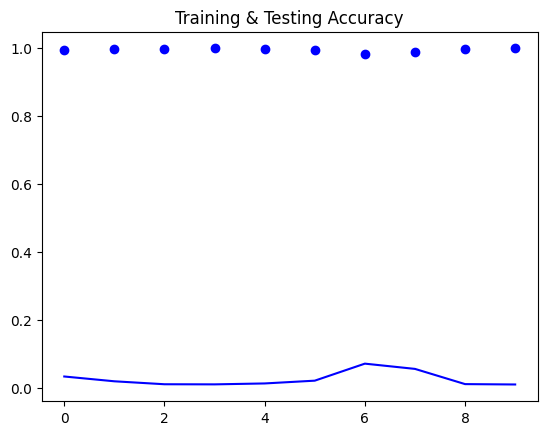

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Models/recognize_face.h5')

1/1 [==============================] - 0s 80ms/step


array([1])

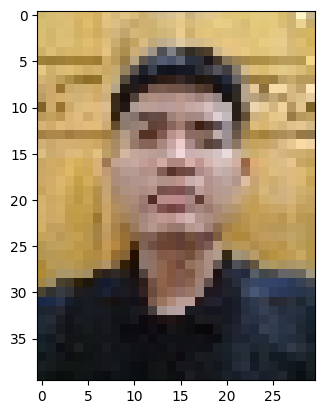

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

url = '/content/drive/MyDrive/AI/Face_Images/Thanh (17).jpg'
img = load_img(url)
plt.imshow(img)

img = load_img(url, target_size = (30,40))
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)